# 📊 Stock Market Analysis using Python
This project analyzes stock data, cleans it, and visualizes trends, using Python libraries such as Pandas, NumPy, Matplotlib, Seaborn, and yfinance.

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

plt.style.use("seaborn-v0_8-darkgrid")


## 📥 Load Stock Dataset

In [5]:

# Example: Download TCS India stock data (2020-2023)
df = yf.download("TCS.NS", start="2020-01-01", end="2023-12-31")
print("Dataset Shape:", df.shape)
df.head()


C:\Users\monis\AppData\Local\Temp\ipykernel_31024\2740911860.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TCS.NS", start="2020-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed

Dataset Shape: (992, 5)


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2020-01-01,1986.125610,2001.060773,1973.664132,1986.492032,1354908
2020-01-02,1977.008179,1997.441234,1969.265670,1997.441234,2380752
2020-01-03,2016.408813,2036.887734,1982.827286,1982.827286,4655761
2020-01-06,2016.225342,2039.590448,2004.726000,2020.394454,3023209
2020-01-07,2021.173584,2029.236658,2000.969593,2016.271403,2429317


## 🧹 Data Cleaning (Missing Values & Outliers)

In [6]:

# Drop missing values
df = df.dropna()

# Remove outliers using IQR
q1 = df['Close'].quantile(0.25)
q3 = df['Close'].quantile(0.75)
iqr = q3 - q1
df = df[(df['Close'] >= q1 - 1.5*iqr) & (df['Close'] <= q3 + 1.5*iqr)]

print("After Cleaning:", df.shape)
df.head()


After Cleaning: (992, 5)


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2020-01-01,1986.125610,2001.060773,1973.664132,1986.492032,1354908.0
2020-01-02,1977.008179,1997.441234,1969.265670,1997.441234,2380752.0
2020-01-03,2016.408813,2036.887734,1982.827286,1982.827286,4655761.0
2020-01-06,2016.225342,2039.590448,2004.726000,2020.394454,3023209.0
2020-01-07,2021.173584,2029.236658,2000.969593,2016.271403,2429317.0


## 📈 Summary Statistics

In [7]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
count,944.000000,944.000000,944.000000,944.000000,9.440000e+02
mean,2998.464988,3026.441214,2970.720011,2999.286157,2.651204e+06
std,480.340798,481.558133,477.623266,480.550015,1.634440e+06
min,1836.856323,1848.287829,1795.697680,1800.184242,2.609490e+05
25%,2867.962219,2899.739857,2843.938172,2872.638851,1.649172e+06
50%,3109.220825,3135.851036,3085.244596,3114.542689,2.208514e+06
75%,3328.864807,3353.079965,3295.843519,3319.141468,3.123980e+06
max,3794.268799,3816.983623,3757.309653,3808.240978,1.983933e+07


## 📉 Stock Closing Price Trend

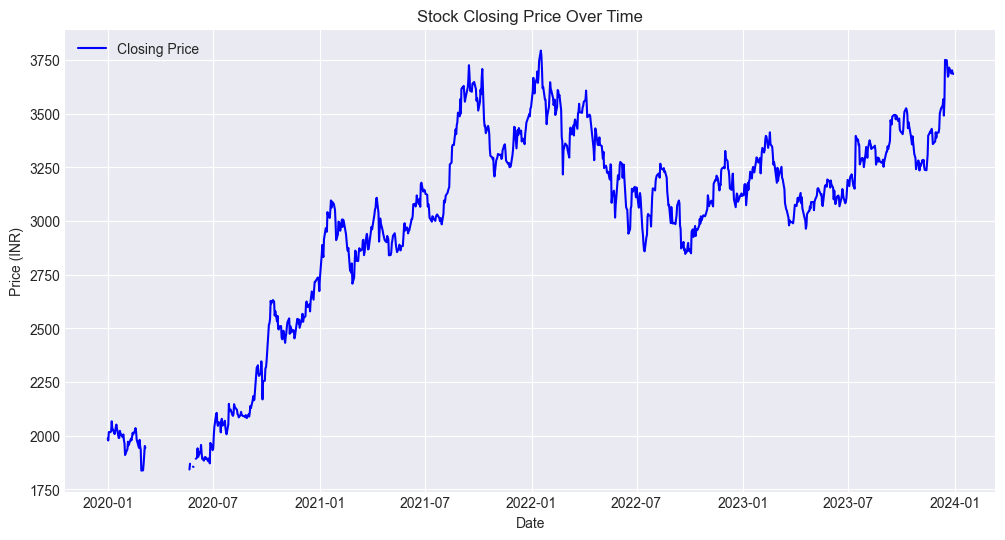

In [8]:

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="Closing Price", color="blue")
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.show()


## 📊 Trading Volume Distribution

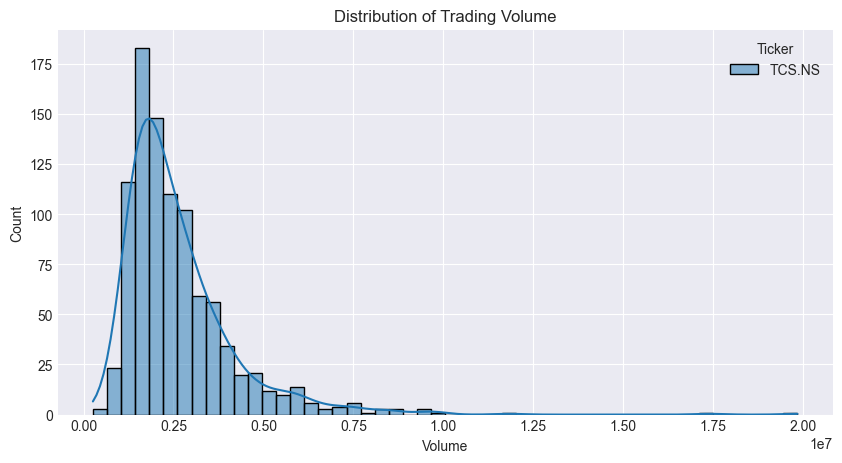

In [9]:

plt.figure(figsize=(10,5))
sns.histplot(df['Volume'], bins=50, kde=True, color="purple")
plt.title("Distribution of Trading Volume")
plt.xlabel("Volume")
plt.show()


## 📉 Moving Averages (50-day & 200-day)

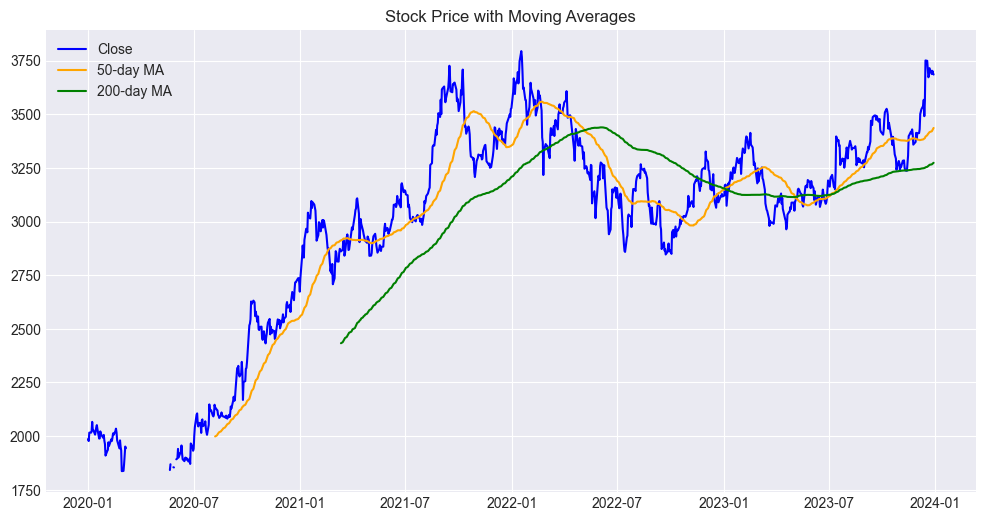

In [10]:

df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="Close", color="blue")
plt.plot(df['MA50'], label="50-day MA", color="orange")
plt.plot(df['MA200'], label="200-day MA", color="green")
plt.legend()
plt.title("Stock Price with Moving Averages")
plt.show()


## 📊 Daily Returns Distribution

C:\Users\monis\AppData\Local\Temp\ipykernel_31024\195761116.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Daily Return'] = df['Close'].pct_change()


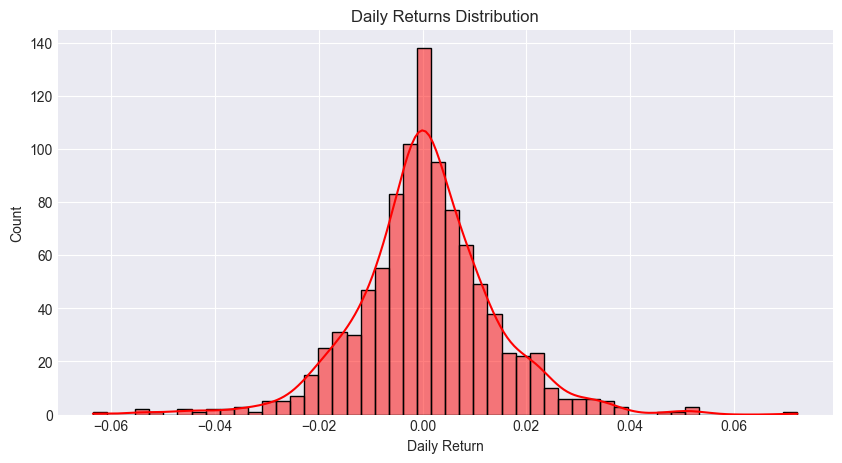

In [11]:

df['Daily Return'] = df['Close'].pct_change()

plt.figure(figsize=(10,5))
sns.histplot(df['Daily Return'].dropna(), bins=50, kde=True, color="red")
plt.title("Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.show()


## ⚡ Volatility Analysis

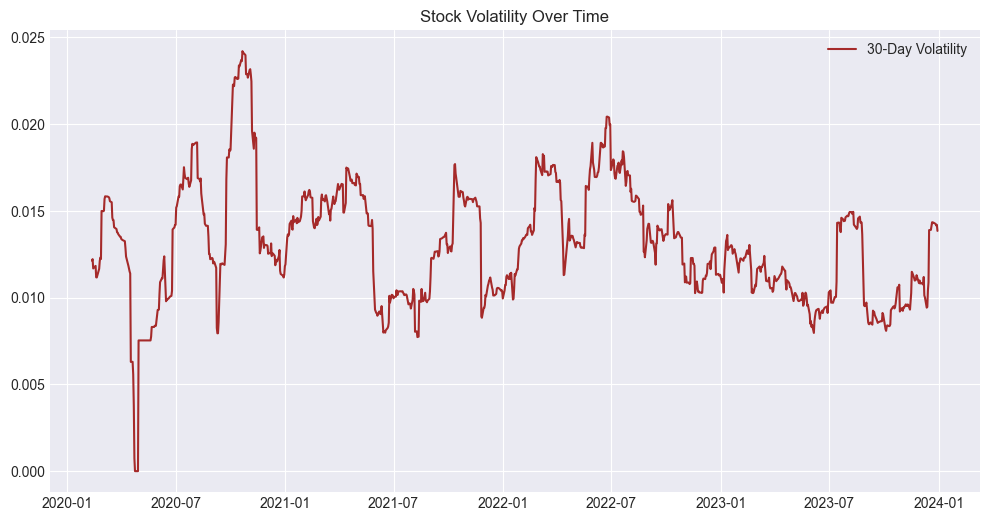

In [12]:

df['Volatility'] = df['Daily Return'].rolling(window=30).std()

plt.figure(figsize=(12,6))
plt.plot(df['Volatility'], label="30-Day Volatility", color="brown")
plt.title("Stock Volatility Over Time")
plt.legend()
plt.show()


## ✅ Key Insights

In [13]:

print("🔹 Stock shows general uptrend with corrections.")
print("🔹 High trading volume periods often align with large price moves.")
print("🔹 Daily returns are mostly small, but extreme values show volatility spikes.")
print("🔹 Moving averages help identify trend direction (crossovers indicate bullish/bearish signals).")


🔹 Stock shows general uptrend with corrections.
🔹 High trading volume periods often align with large price moves.
🔹 Daily returns are mostly small, but extreme values show volatility spikes.
🔹 Moving averages help identify trend direction (crossovers indicate bullish/bearish signals).
